<a href="https://colab.research.google.com/github/Forkyknight/Geeksman_AISqaud_Project1_Chirag/blob/master/3%3Dprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

drive folder link containing export.pkl,path file and pdf =https://drive.google.com/drive/folders/1s_vSUjuh2tqF5q8ebzUtL9_kSpC7cat1?usp=sharing

first go through this demo video which i created in the end


In [ ]:
HTML(f"""<video src={'https://drive.google.com/uc?id=17NCVCKL5xl-gNjlYE7gM2hztkAuW3LKn'} width=500 controls/>""")

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import sys
from PIL import Image as IM
from google.colab.patches import cv2_imshow
from IPython.display import HTML
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-2MfoaODD2XGpWcmbB9OKhWL4DaC-580' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-2MfoaODD2XGpWcmbB9OKhWL4DaC-580" -O export.pkl && rm -rf /tmp/cookies.txt

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-05 15:05:57--  https://docs.google.com/uc?export=download&confirm=N4CB&id=1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra
Resolving docs.google.com (docs.google.com)... 172.253.114.138, 172.253.114.101, 172.253.114.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.114.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-48-docs.googleusercontent.com/docs/securesc/hj94o9hfdlbc5o9fdd33gdn66d0hu6dm/69fk5h1gdag60s66dhgbg6tsaakkintj/1596639900000/17368260815928528452/09623204318570381752Z/1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra?e=download [following]
--2020-08-05 15:05:57--  https://doc-08-48-docs.googleusercontent.com/docs/securesc/hj94o9hfdlbc5o9fdd33gdn66d0hu6dm/69fk5h1gdag60s66dhgbg6tsaakkintj/1596639900000/17368260815928528452/09623204318570381752Z/1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra?e=download
Resolving doc-08-48-docs.googleusercontent.com (doc-08-48-docs.googleusercontent.com)... 173.194.198.132, 2607:f8b0:4001:c06::84
Conne

In [ ]:
my_dir=""

In [ ]:
predictor = load_learner(my_dir)

The below my predictor function will predict the class of image to which it belong

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

here we are creating two directories of extract(for face extracted images) and frames(for getting frames of video)

In [ ]:
!mkdir frames extract

the cord_face function below will detect all the faces in the given input image and will higlifht those faces by putting a rectangle on face and this fuction return the values all coordinate where faces are present)

In [ ]:
  def cord_face(imagePath):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )

    print("[INFO] Found {0} Faces!".format(len(faces)))

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

    status = cv2.imwrite(imagePath, image)
    #print("[INFO] Image faces_detected.jpg written to filesystem: ", status)
    extract_face(faces,imagePath)
    return (faces,imagePath)
    

the extract function will extract only the face images from the given image and store then in extract directory which we created earlier ...and we will use these extract to predict there coresponding emotion

In [ ]:

def extract_face(faces,imagePath):
  j=0
  image = cv2.imread(imagePath)
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w] 
    #print("[INFO] Object found. Saving locally.") 
    #cv2.imwrite( "/content/res/"+str(i)+".jpg", roi_color)
    #image = cv2.imread("/content/res/"+str(i)+".jpg")
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)
    I=IM.fromarray(gray)
    I.save("/content/extract/"+str(j)+".jpg")
    j=j+1


and this final function will write the predicted emotion of all the faces above the corresponding face rectangles

In [ ]:
def final(faces,imagePath):
  k=0;
  for (x,y,w,h) in faces:
    img=cv2.imread(imagePath)
    img1=cv2.imread("extract/"+str(k)+".jpg")
    cv2.imwrite("temp.jpg",img1)
    ans_text=my_predictor("temp.jpg")
    font = cv2.FONT_HERSHEY_SIMPLEX 
    #font = cv2.PACIFICO
    org = (x,y) 
    fontScale = 0.6
    color = (255, 160, 0) 
    thickness = 2
    img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
    cv2.imwrite(imagePath, img)
    
    k=k+1


input function will take only the path of image and will pridict its emotion


In [ ]:
def input_img(path):
  (faces,imagePath)=cord_face(path)
  final(faces,imagePath)
  img = cv2.imread(imagePath)
  cv2_imshow(img)
  !rm /content/extract/*".jpg"
  #!rm /content/frames/*".jpg"

here is the example

In [ ]:
!wget -O 'my.jpg' 'https://drive.google.com/uc?id=1P27ICI0POAXvMOIxlZOeYx-mrePEYFfZ'

--2020-08-05 05:19:53--  https://drive.google.com/uc?id=1P27ICI0POAXvMOIxlZOeYx-mrePEYFfZ
Resolving drive.google.com (drive.google.com)... 173.194.211.101, 173.194.211.139, 173.194.211.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48hcjq6ti9pd0vdrm9gh73gs38cknk81/1596604725000/17368260815928528452/*/1P27ICI0POAXvMOIxlZOeYx-mrePEYFfZ [following]
--2020-08-05 05:19:53--  https://doc-0k-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48hcjq6ti9pd0vdrm9gh73gs38cknk81/1596604725000/17368260815928528452/*/1P27ICI0POAXvMOIxlZOeYx-mrePEYFfZ
Resolving doc-0k-10-docs.googleusercontent.com (doc-0k-10-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-10-docs.googleusercontent.com (doc-0k-10-docs.googleusercontent.com)|1

[INFO] Found 2 Faces!


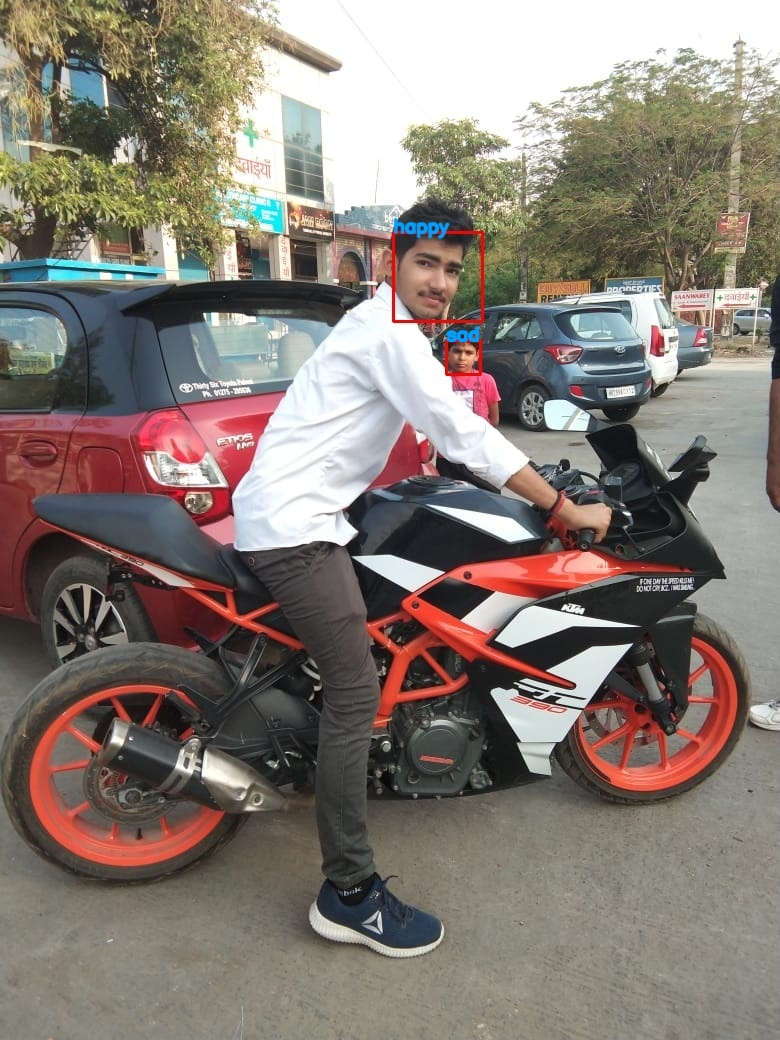

In [ ]:
input_img("my.jpg")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving face.csv to face.csv


In [ ]:
#!pip install -U kora
#from kora.drive import upload_public
#url = upload_public('face.csv')
#url

'https://drive.google.com/uc?id=1mXAFpa_UQS8eh4Tt9jQIEOKFX0CSFHrp'

In [ ]:
!wget -O "face.csv" "https://drive.google.com/uc?id=1mXAFpa_UQS8eh4Tt9jQIEOKFX0CSFHrp"

--2020-08-05 15:01:01--  https://drive.google.com/uc?id=1mXAFpa_UQS8eh4Tt9jQIEOKFX0CSFHrp
Resolving drive.google.com (drive.google.com)... 142.250.1.101, 142.250.1.100, 142.250.1.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0a0rqst5u943svvpdg2k65avrrphbemb/1596639600000/17368260815928528452/*/1mXAFpa_UQS8eh4Tt9jQIEOKFX0CSFHrp [following]
--2020-08-05 15:01:01--  https://doc-08-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0a0rqst5u943svvpdg2k65avrrphbemb/1596639600000/17368260815928528452/*/1mXAFpa_UQS8eh4Tt9jQIEOKFX0CSFHrp
Resolving doc-08-10-docs.googleusercontent.com (doc-08-10-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c0d::84
Connecting to doc-08-10-docs.googleusercontent.com (doc-08-10-docs.googleusercontent.com)|108.177.1

In [ ]:
folder = 'test face'
url_file = 'face.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=50)

In [ ]:
list_img=os.listdir("/content/my_data/test face/")
list_img

['00000037.jpg',
 '00000001.jpg',
 '00000005.jpg',
 '00000032.jpg',
 '00000041.jpg',
 '00000006.jpg',
 '00000023.jpg',
 '00000015.jpg',
 '00000020.jpg',
 '00000018.jpg',
 '00000033.jpg',
 '00000038.jpg',
 '00000043.jpg',
 '00000012.jpg',
 '00000024.jpg',
 '00000002.jpg',
 '00000004.jpg',
 '00000049.jpg',
 '00000047.jpg',
 '00000042.jpg',
 '00000022.jpg',
 '00000046.jpg',
 '00000016.jpg',
 '00000045.jpg',
 '00000031.jpg',
 '00000027.jpg',
 '00000036.jpg',
 '00000021.jpg',
 '00000013.jpg',
 '00000009.jpg',
 '00000010.jpg',
 '00000007.jpg',
 '00000019.jpg',
 '00000017.jpg',
 '00000048.jpg',
 '00000039.jpg',
 '00000035.jpg',
 '00000014.jpg',
 '00000030.jpg',
 '00000000.jpg',
 '00000028.jpg',
 '00000008.jpg',
 '00000003.jpg',
 '00000025.jpg',
 '00000026.jpg',
 '00000044.jpg',
 '00000029.jpg',
 '00000011.jpg',
 '00000034.jpg',
 '00000040.jpg']

[INFO] Found 1 Faces!


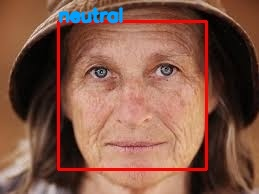

[INFO] Found 1 Faces!


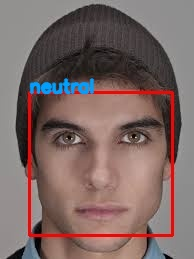

[INFO] Found 0 Faces!


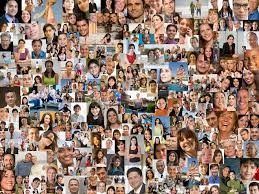

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 0 Faces!


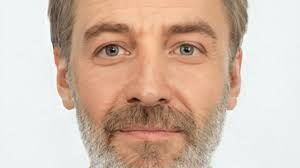

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 0 Faces!


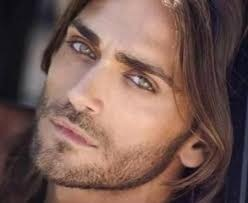

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 1 Faces!


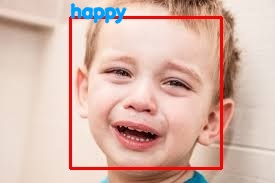

[INFO] Found 1 Faces!


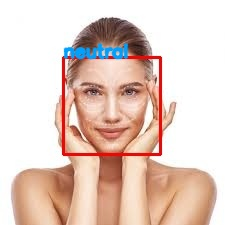

[INFO] Found 2 Faces!


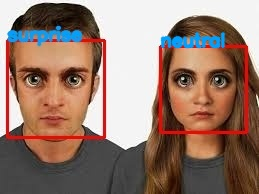

[INFO] Found 1 Faces!


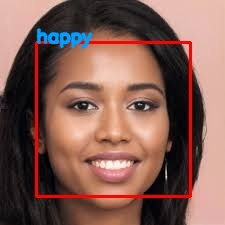

[INFO] Found 0 Faces!


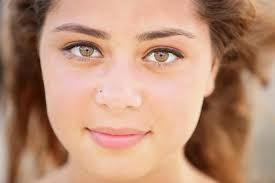

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 8 Faces!


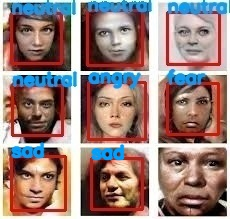

[INFO] Found 6 Faces!


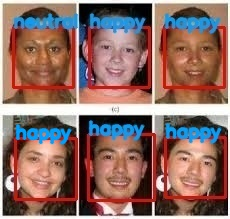

[INFO] Found 2 Faces!


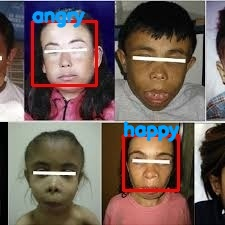

[INFO] Found 9 Faces!


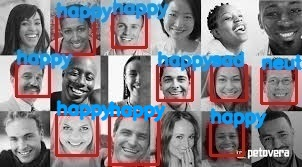

[INFO] Found 1 Faces!


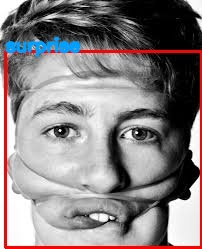

[INFO] Found 7 Faces!


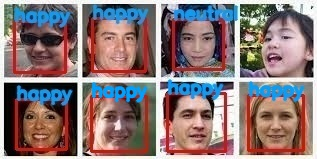

[INFO] Found 4 Faces!


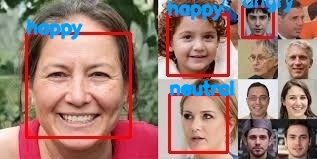

[INFO] Found 2 Faces!


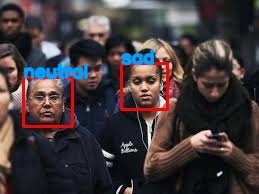

[INFO] Found 0 Faces!


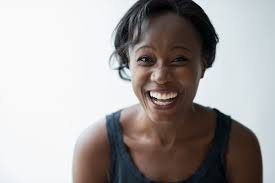

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 0 Faces!


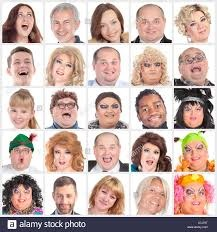

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 10 Faces!


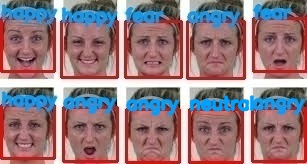

[INFO] Found 11 Faces!


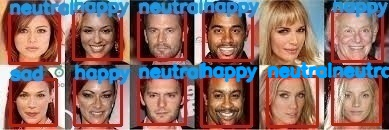

[INFO] Found 0 Faces!


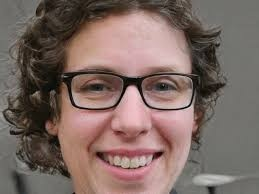

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 0 Faces!


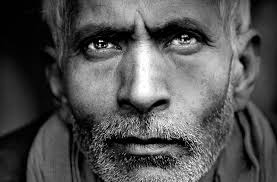

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 4 Faces!


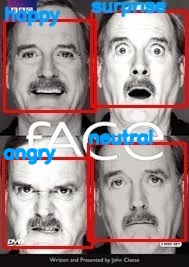

[INFO] Found 2 Faces!


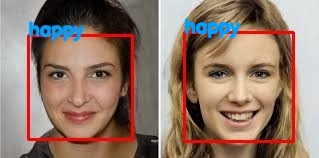

[INFO] Found 0 Faces!


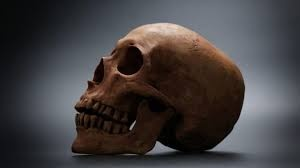

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 1 Faces!


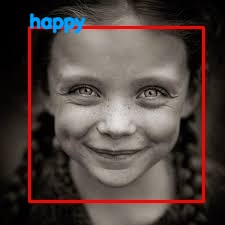

[INFO] Found 5 Faces!


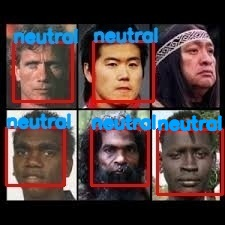

[INFO] Found 2 Faces!


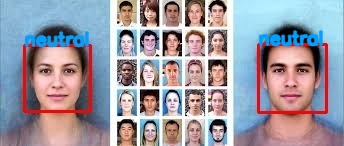

[INFO] Found 14 Faces!


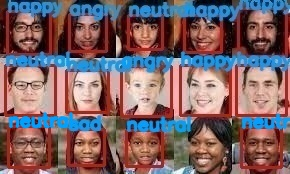

[INFO] Found 0 Faces!


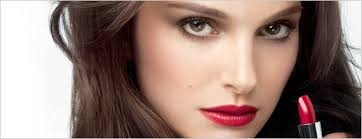

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 1 Faces!


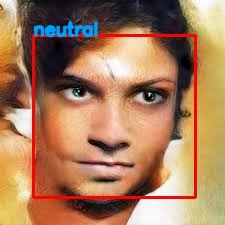

[INFO] Found 4 Faces!


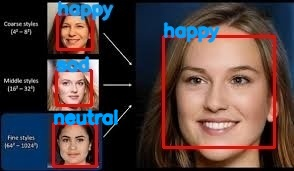

[INFO] Found 2 Faces!


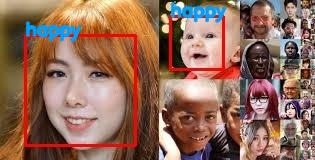

[INFO] Found 0 Faces!


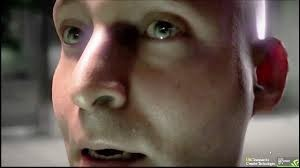

rm: cannot remove '/content/extract/*.jpg': No such file or directory
[INFO] Found 3 Faces!


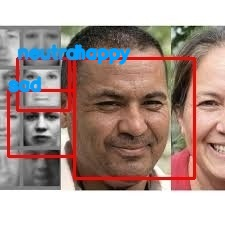

[INFO] Found 1 Faces!


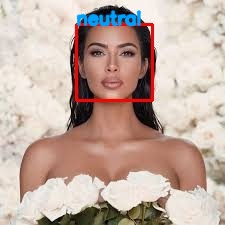

[INFO] Found 1 Faces!


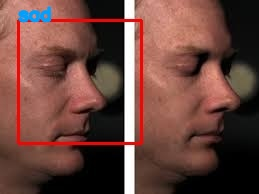

[INFO] Found 13 Faces!


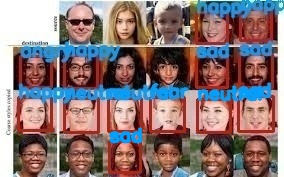

[INFO] Found 1 Faces!


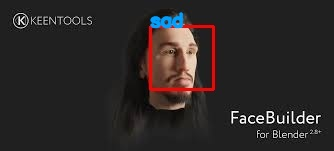

[INFO] Found 8 Faces!


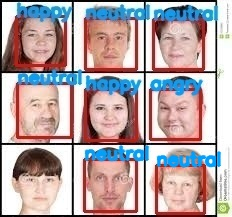

[INFO] Found 6 Faces!


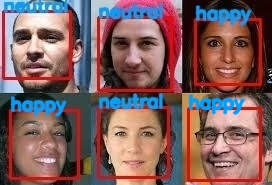

[INFO] Found 1 Faces!


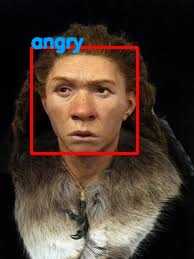

[INFO] Found 2 Faces!


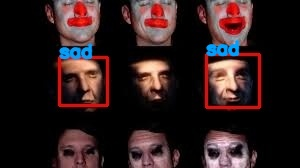

[INFO] Found 1 Faces!


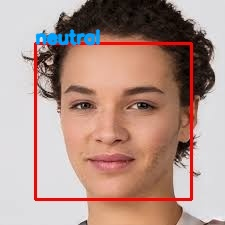

[INFO] Found 1 Faces!


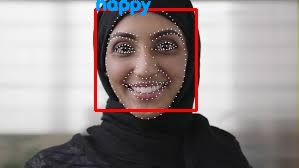

[INFO] Found 1 Faces!


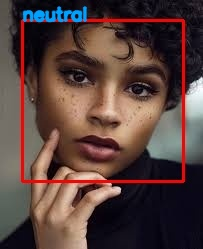

[INFO] Found 1 Faces!


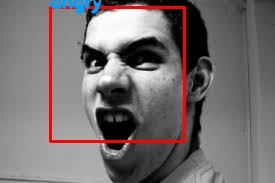

[INFO] Found 1 Faces!


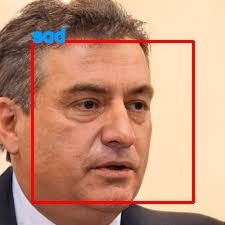

In [ ]:
for img in list_img:
  input_img("/content/my_data/test face/"+img)

In [ ]:
!mkdir final_images

In [ ]:
from PIL import Image
def resize(path,dir,resized_img):
  i=0
  for item in dir:
    if os.path.isfile(path+item):
      im = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      imResize = im.resize((400,400), Image.ANTIALIAS)
      imResize.save(resized_img + str(i)+'.jpg', 'JPEG', quality=90)
      i=i+1
path = "/content/my_data/test face/"
dir = os.listdir( path )
resized_img="/content/final_images/"
resize(path,dir,resized_img)

In [ ]:

%cd "/content/final_images/"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_emo.mp4
%cd ..


/content/final_images
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enabl

In [ ]:

#url = upload_public('song.mp3')
#url

'https://drive.google.com/uc?id=1eUtIeGJjw4zHTdG7_mvI5PXRzInEgU-R'

In [ ]:
!wget -O "song.mp3" "https://drive.google.com/uc?id=1eUtIeGJjw4zHTdG7_mvI5PXRzInEgU-R"

--2020-08-05 15:20:14--  https://drive.google.com/uc?id=1eUtIeGJjw4zHTdG7_mvI5PXRzInEgU-R
Resolving drive.google.com (drive.google.com)... 172.217.214.113, 172.217.214.102, 172.217.214.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rnlrbdp93k4vojaa1dqvm1gg54pml4ep/1596640800000/17368260815928528452/*/1eUtIeGJjw4zHTdG7_mvI5PXRzInEgU-R [following]
--2020-08-05 15:20:15--  https://doc-0o-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rnlrbdp93k4vojaa1dqvm1gg54pml4ep/1596640800000/17368260815928528452/*/1eUtIeGJjw4zHTdG7_mvI5PXRzInEgU-R
Resolving doc-0o-10-docs.googleusercontent.com (doc-0o-10-docs.googleusercontent.com)... 173.194.197.132, 2607:f8b0:4001:c12::84
Connecting to doc-0o-10-docs.googleusercontent.com (doc-0o-10-docs.googleusercontent.com)|1

In [ ]:
!ffmpeg  -i "final_emo.mp4" -ss 0:1:20 -t 58 -i "song.mp3" -map 0:v:0 -map 1:a:0 -y out.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:

from kora.drive import upload_public
url = upload_public('out.mp4')
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
url

'https://drive.google.com/uc?id=17NCVCKL5xl-gNjlYE7gM2hztkAuW3LKn'

if you want to access this video then just go to this link=https://drive.google.com/uc?id=1suxnOekRJ87_151sVYuXyxozKk69CqDq

In [ ]:
#def frame(path):
#  cap= cv2.VideoCapture(path)
#  i=0
#  while(cap.isOpened()):
#      ret, frame = cap.read()
#      if ret == False:
#          break
#      cv2.imwrite("/content/frames/"+str(i)+".jpg",frame)
#      input_img("/content/frames/"+str(i)+".jpg")
#      i+=1
#  
#  cap.release()
 
#def vid():
#  %cd "frames"
#  !ffmpeg -framerate 20 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
#  %cd ..
#  url = upload_public('my_final_output.mp4')
#  HTML(f"""<video src={url} width=500 controls/>""")
#  !rm /content/frames/*".jpg"
 
#def input_vid(path):
#  frame(path)
#  vid()

In [ ]:
#import cv2
#cap= cv2.VideoCapture(-1)
#i=0
#while(True):
#  img=cap.read()
#  cv2.imshow("captured",img)
#  if cv2.waitkey(1) & 0xFF==ord('q'):
#    break
#cap.release()
#cv2.destroyAllWindows()